In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


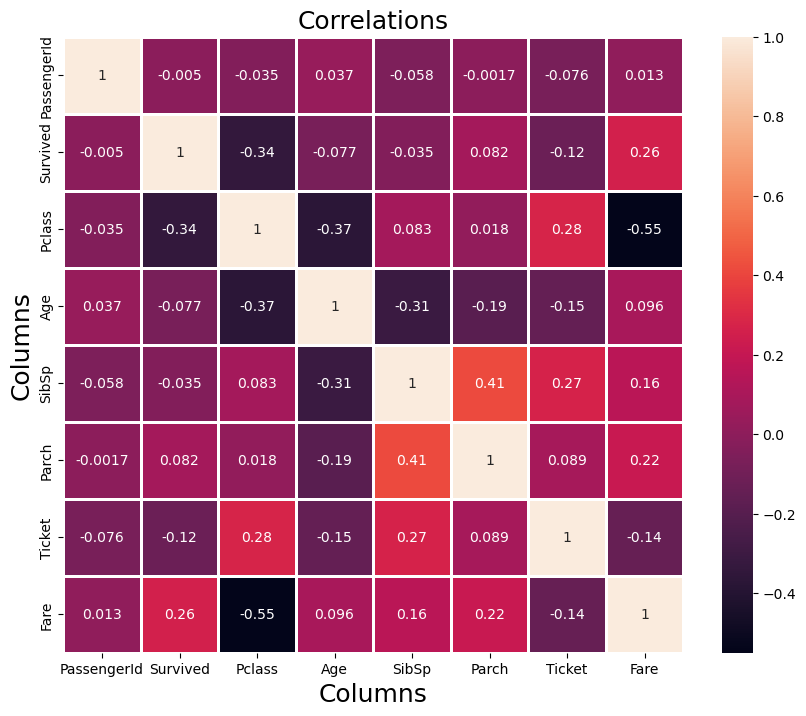

In [5]:
plt.figure(figsize=(10, 8))

data1 = data.apply(pd.to_numeric, errors='coerce')
data1 = data1.dropna(axis=1, how='all')  

sns.heatmap(data1.corr(), annot=True, linewidths=1, linecolor='w')

plt.title('Correlations', fontsize=18)
plt.xlabel('Columns', fontsize=18)
plt.ylabel('Columns', fontsize=18)
plt.savefig('titanic.png')
plt.show()

In [431]:
sns.set()
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [432]:
numerical_data=data[['PassengerId','Pclass','Fare']].copy()

In [433]:
survival_data=data['Survived'].copy()

In [434]:
from sklearn.model_selection import train_test_split

In [435]:
X,x_test,Y,y_test=train_test_split(numerical_data,survival_data,test_size=0.3,random_state=5)

In [436]:
from sklearn.linear_model import LogisticRegression

In [437]:
model=LogisticRegression()

In [438]:
model.fit(X,Y)

LogisticRegression()

In [439]:
predictions=model.predict(x_test)

In [440]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [441]:
confusion=confusion_matrix(predictions,y_test)

In [442]:
confusion

array([[150,  60],
       [ 17,  41]], dtype=int64)

In [443]:
score=accuracy_score(predictions,y_test)

In [444]:
score

0.7126865671641791

# Importing the test data

In [445]:
test_data=pd.read_csv('test.csv')

In [446]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [447]:
test_data1=test_data[['PassengerId','Pclass','Fare']].copy()

In [448]:
test_data1.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [449]:
test_data1['Fare']=test_data['Fare'].fillna(10)

In [450]:
test_predictions=model.predict(test_data1)

In [451]:
test_predictions_df={
    'PassengerId':test_data['PassengerId'],
    'Survived':test_predictions
}

In [452]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [453]:
test_predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [454]:
test_predictions_df=test_predictions_df.set_index('PassengerId')

In [455]:
test_predictions_df.to_csv('submission.csv')

# To increase accuracy

In [456]:
numerical_data1=data[['PassengerId','Parch','Pclass','Sex']].copy()

In [457]:
numerical_data1['Sex']=numerical_data1['Sex'].map({'female':1,'male':0})

In [458]:
numerical_data1.head()

,PassengerId,Parch,Pclass,Sex
0,1,0,3,0
1,2,0,1,1
2,3,0,3,1
3,4,0,1,1
4,5,0,3,0


In [459]:
survival_data1=data['Survived'].copy()

In [460]:
X,x_test,Y,y_test=train_test_split(numerical_data1,survival_data1,test_size=0.3,random_state=42)

In [461]:
model=LogisticRegression()

In [462]:
numerical_data1.isnull().sum()

PassengerId    0
Parch          0
Pclass         0
Sex            0
dtype: int64

In [463]:
data1=data.copy()

In [464]:
data1['Sex']=data['Sex'].map({'female':1,'male':0})

In [465]:
stack=data1[['Sex','Survived']]

In [466]:
gender=stack['Sex'].value_counts()

In [467]:
sur=stack['Survived'].value_counts().head()

In [468]:
final=data1.groupby('Sex')['Survived'].value_counts()

In [469]:
final

Sex  Survived
0    0           468
     1           109
1    1           233
     0            81
Name: count, dtype: int64

<Axes: xlabel='Sex'>

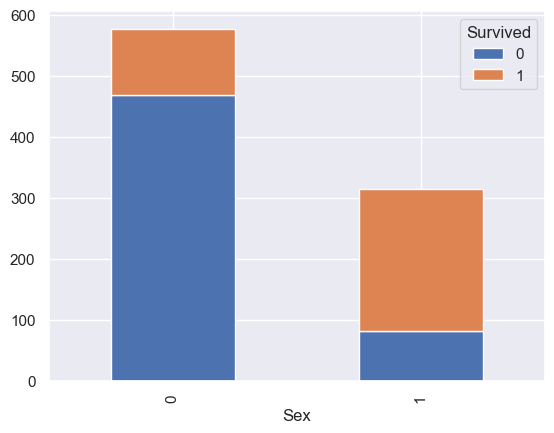

In [470]:
final.unstack().plot(kind='bar',stacked=True)

In [471]:
model.fit(X,Y)

LogisticRegression()

In [472]:
predictions=model.predict(x_test)

In [473]:
confusion=confusion_matrix(predictions,y_test)

In [474]:
confusion

array([[135,  34],
       [ 22,  77]], dtype=int64)

In [475]:
score=accuracy_score(predictions,y_test)

In [476]:
score

0.7910447761194029

In [477]:
#saving new data
test_data2=test_data[['PassengerId','Parch','Pclass','Sex']].copy()

In [478]:
test_data2['Sex']=test_data2['Sex'].map({'female':1,'male':0})

In [479]:
test_predictions=model.predict(test_data2)

In [480]:
test_predictions_df={
    'PassengerId':test_data['PassengerId'],
    'Survived':test_predictions
}

In [481]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [482]:
test_predictions_df=test_predictions_df.set_index('PassengerId')

In [483]:
test_predictions_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


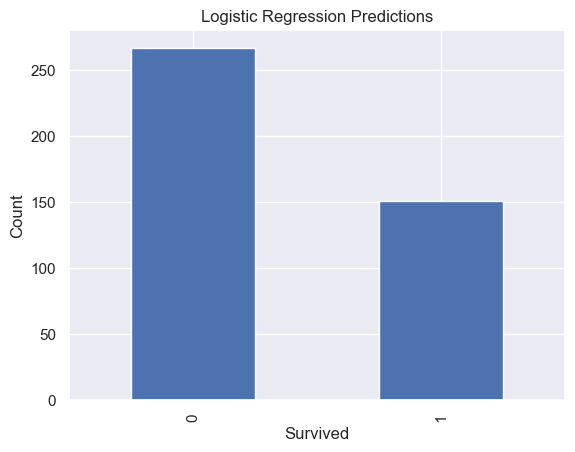

In [484]:
survived_count = test_predictions_df['Survived'].value_counts()

survived_count.plot(kind='bar')

plt.title("Logistic Regression Predictions")
plt.ylabel("Count")
plt.show()

In [485]:
test_predictions_df.to_csv('finalsubmission.csv')

# KNN

In [486]:
from sklearn.neighbors import KNeighborsClassifier

In [487]:
knn_model = KNeighborsClassifier()

In [488]:
knn_model.fit(X, Y)

KNeighborsClassifier()

In [489]:
knn_predictions = knn_model.predict(x_test)

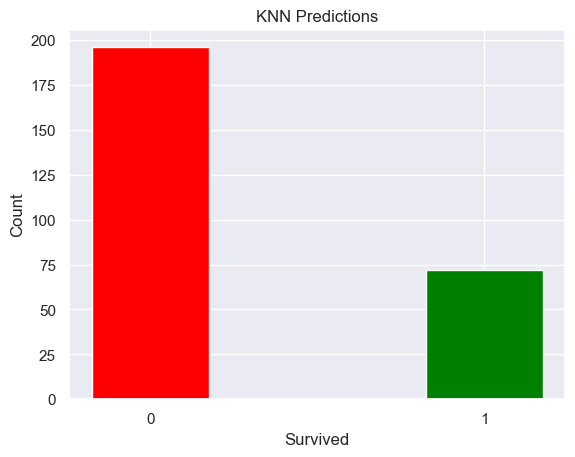

In [490]:
zero_count = len(knn_predictions[knn_predictions==0]) 
one_count = len(knn_predictions[knn_predictions==1])

xs = [0,1]
width = 0.35 

fig, ax = plt.subplots()
ax.bar(xs, [zero_count, one_count], width, color=['red','green'])

ax.set_xticks([0,1])
ax.set_xticklabels(['0','1'])
ax.set_title("KNN Predictions")
ax.set_ylabel("Count")
ax.set_xlabel("Survived")
plt.show()

In [491]:
knn_score = accuracy_score(knn_predictions, y_test)

In [492]:
knn_score

0.5559701492537313

# Decision Tree

In [493]:
from sklearn.tree import DecisionTreeClassifier

In [494]:
decision_model = DecisionTreeClassifier()

In [495]:
decision_model.fit(X, Y)

DecisionTreeClassifier()

In [496]:
decision_predictions = decision_model.predict(x_test)

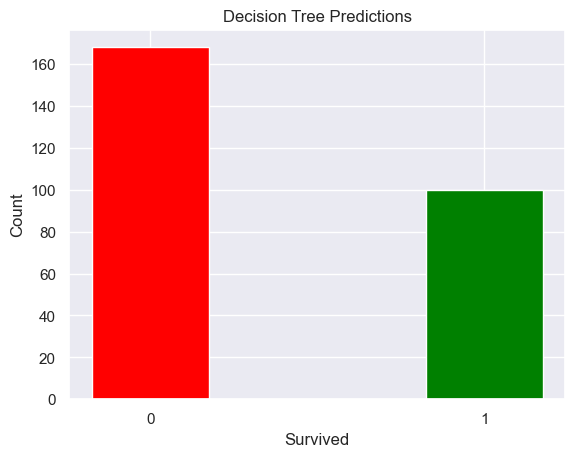

In [497]:
zero_count = len(decision_predictions[decision_predictions==0]) 
one_count = len(decision_predictions[decision_predictions==1])

xs = [0,1]
width = 0.35 

fig, ax = plt.subplots()
ax.bar(xs, [zero_count, one_count], width, color=['red','green'])

ax.set_xticks([0,1])
ax.set_xticklabels(['0','1'])
ax.set_title("Decision Tree Predictions")
ax.set_ylabel("Count")
ax.set_xlabel("Survived")
plt.show()

In [498]:
decision_score = accuracy_score(decision_predictions, y_test)

In [499]:
decision_score

0.7126865671641791